## Context
This is real time data of a retail grocery store in Resistencia Chaco Argentina (where I'm currently living in). \
The data is first collected through normal business operation into a Barcode system designed by me in Microsoft Excel. After that is transformed and cleaned in the Power Query Editor, which then is loaded and saved as a CSV file (which then can also be stored in a SSMS database). \
Column name translation and description: \
a) Fecha ---> Date. (Date of which the transaction was recorded). \
b) Product_ID (Product PK identity). \
c) Código ---> Product Code (which I preferably didn't use as primary key). \
d) Categoría ---> Category. \
e) Producto ---> Product Name. \
f) Precio Costo ---> Unit Cost (of the product). \
g) Total COGS ---> Total cost of good sold (because some clients buyed more than one item at the time). \
h) Cantidad ---> Quantity (quantity buyed). \
i) Precio Unitario ---> Unit Price (sale price of the product). \
j) Monto ---> Sales Amount (total amount in $ of the transaciton). 

### Exploratory Data Analysis

In [182]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
df = pd.read_csv('C:/Users/faust/Desktop/Portfolio Projects/Barcode System/Grocery Store Data/CSV/sales_csv.csv',
                 encoding = 'ISO-8859-1')

In [184]:
df.head()

,Fecha,Product_ID,Código,Categoría,Producto,Precio Costo,Total COGS,Cantidad,Precio Unitario,Monto
0,25/06/2022,58,9.54456E+11,Carga,"Carga Virtual (Tipear TOTAL DE CARGA en: ""Mont...",1.0,400.0,400,1.0,440.0
1,25/06/2022,41,7.79811E+12,Aperitivo,Fernandito 1000ml,113.0,113.0,1,150.0,150.0
2,25/06/2022,108,77978141,Cigarrillo,Marlboro Fusión 10 10,190.0,190.0,1,250.0,250.0
3,25/06/2022,317,REPUESTODIBUJOBLANCO5,Librería,Repuesto Dibujo N°5 El Nene 1,23.0,184.0,8,30.0,240.0
4,25/06/2022,191,1.47852E+11,Fotocopia,IMPRESIÓN A4 1,0.0,0.0,8,20.0,160.0


In [185]:
df.tail()

,Fecha,Product_ID,Código,Categoría,Producto,Precio Costo,Total COGS,Cantidad,Precio Unitario,Monto
3700,24/08/2022,3,AGUACALIENTE,Agua,Agua caliente 1,0.0,0.0,1,50.0,50.0
3701,24/08/2022,111,77977038,Cigarrillo,Lucky Strike 20 Convertible Box 20,320.0,320.0,1,370.0,370.0
3702,24/08/2022,106,77916433,Cigarrillo,Marlboro 20 Común 20,325.0,325.0,1,370.0,370.0
3703,24/08/2022,81,7.79004E+12,Chocolate,Tatín Blanco Simple 1,38.0,76.0,2,50.0,100.0
3704,24/08/2022,225,7.7909E+12,Gaseosa,Fanta 2250ml,263.0,263.0,1,350.0,350.0


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3705 entries, 0 to 3704
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fecha            3705 non-null   object 
 1   Product_ID       3705 non-null   int64  
 2   Código           3705 non-null   object 
 3   Categoría        3705 non-null   object 
 4   Producto         3705 non-null   object 
 5   Precio Costo     3705 non-null   float64
 6   Total COGS       3705 non-null   float64
 7   Cantidad         3705 non-null   int64  
 8   Precio Unitario  3705 non-null   float64
 9   Monto            3705 non-null   float64
dtypes: float64(4), int64(2), object(4)
memory usage: 289.6+ KB


In [187]:
# Unique values
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())

Fecha 61 ['25/06/2022' '26/06/2022' '27/06/2022' '28/06/2022' '29/06/2022'
 '30/06/2022' '01/07/2022' '02/07/2022' '03/07/2022' '04/07/2022'
 '05/07/2022' '06/07/2022' '07/07/2022' '08/07/2022' '09/07/2022'
 '10/07/2022' '11/07/2022' '12/07/2022' '13/07/2022' '14/07/2022'
 '15/07/2022' '16/07/2022' '17/07/2022' '18/07/2022' '19/07/2022'
 '20/07/2022' '21/07/2022' '22/07/2022' '23/07/2022' '24/07/2022'
 '25/07/2022' '26/07/2022' '27/07/2022' '28/07/2022' '29/07/2022'
 '30/07/2022' '31/07/2022' '01/08/2022' '02/08/2022' '03/08/2022'
 '04/08/2022' '05/08/2022' '06/08/2022' '07/08/2022' '08/08/2022'
 '09/08/2022' '10/08/2022' '11/08/2022' '12/08/2022' '13/08/2022'
 '14/08/2022' '15/08/2022' '16/08/2022' '17/08/2022' '18/08/2022'
 '19/08/2022' '20/08/2022' '21/08/2022' '22/08/2022' '23/08/2022'
 '24/08/2022']
Product_ID 377 [ 58  41 108 317 191 192 187 311 109 451 355  60 224 200 228 114 255 267
 274  15  81 247  59 119 188  24 435 105 243  14 164  61 265  18 450 442
 288 112 263 460   3  9

In [188]:
df.dtypes

Fecha               object
Product_ID           int64
Código              object
Categoría           object
Producto            object
Precio Costo       float64
Total COGS         float64
Cantidad             int64
Precio Unitario    float64
Monto              float64
dtype: object

In [189]:
# Generating Day & Month features
df['Fecha'] = pd.to_datetime(df.Fecha, dayfirst=True)
df['Day'] = df['Fecha'].dt.day_name()
df['Month'] = df['Fecha'].dt.month_name()

In [190]:
df.head()

,Fecha,Product_ID,Código,Categoría,Producto,Precio Costo,Total COGS,Cantidad,Precio Unitario,Monto,Day,Month
0,2022-06-25,58,9.54456E+11,Carga,"Carga Virtual (Tipear TOTAL DE CARGA en: ""Mont...",1.0,400.0,400,1.0,440.0,Saturday,June
1,2022-06-25,41,7.79811E+12,Aperitivo,Fernandito 1000ml,113.0,113.0,1,150.0,150.0,Saturday,June
2,2022-06-25,108,77978141,Cigarrillo,Marlboro Fusión 10 10,190.0,190.0,1,250.0,250.0,Saturday,June
3,2022-06-25,317,REPUESTODIBUJOBLANCO5,Librería,Repuesto Dibujo N°5 El Nene 1,23.0,184.0,8,30.0,240.0,Saturday,June
4,2022-06-25,191,1.47852E+11,Fotocopia,IMPRESIÓN A4 1,0.0,0.0,8,20.0,160.0,Saturday,June


In [191]:
df.describe()

,Product_ID,Precio Costo,Total COGS,Cantidad,Precio Unitario,Monto
count,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000
mean,177.751417,100.532297,141.776243,26.385425,145.056675,199.747806
std,115.990227,106.297056,150.080296,104.558769,146.894803,191.198053
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,88.000000,1.000000,32.000000,1.000000,20.000000,60.000000
50%,186.000000,75.000000,105.000000,1.000000,100.000000,160.000000
75%,235.000000,173.000000,200.000000,2.000000,240.000000,270.000000
max,529.000000,750.000000,2000.000000,2000.000000,2000.000000,2200.000000


#### NaN values

In [192]:
df.isnull().mean()*100

Fecha              0.0
Product_ID         0.0
Código             0.0
Categoría          0.0
Producto           0.0
Precio Costo       0.0
Total COGS         0.0
Cantidad           0.0
Precio Unitario    0.0
Monto              0.0
Day                0.0
Month              0.0
dtype: float64

### 2.1 Visualize Data

#### Products & Categories Performance

##### TRENDS

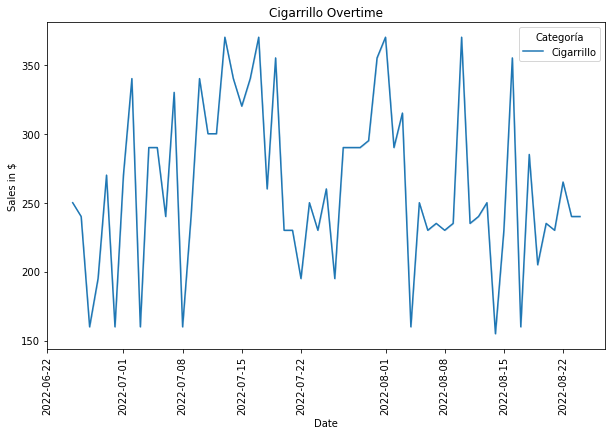

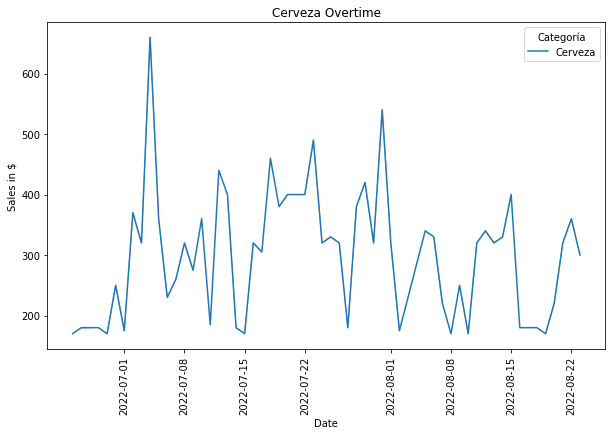

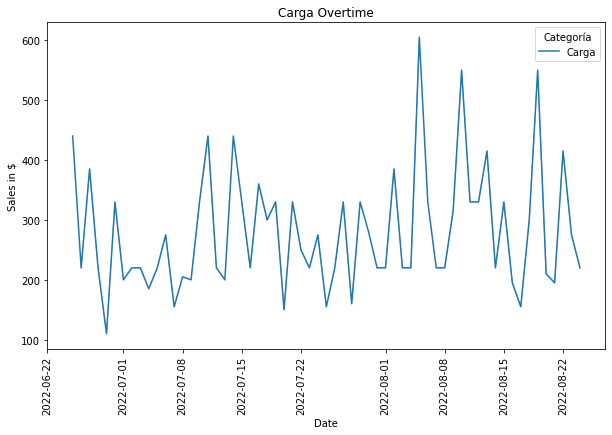

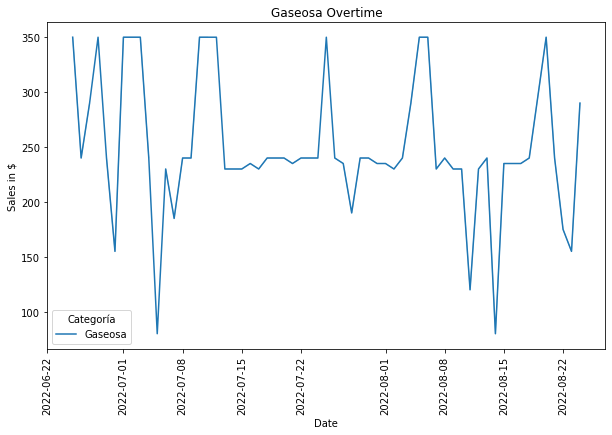

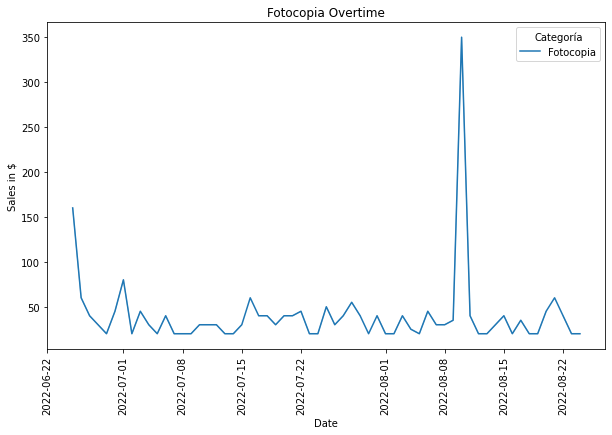

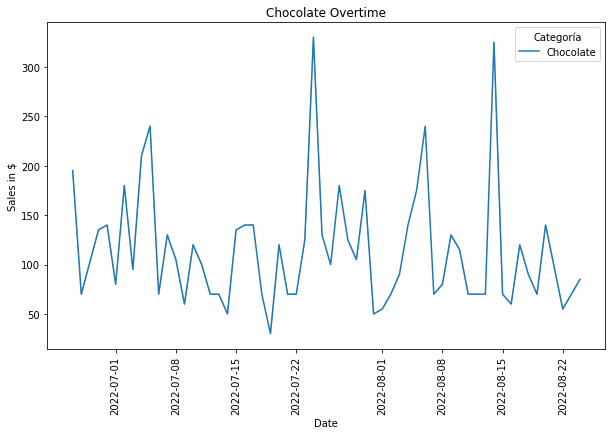

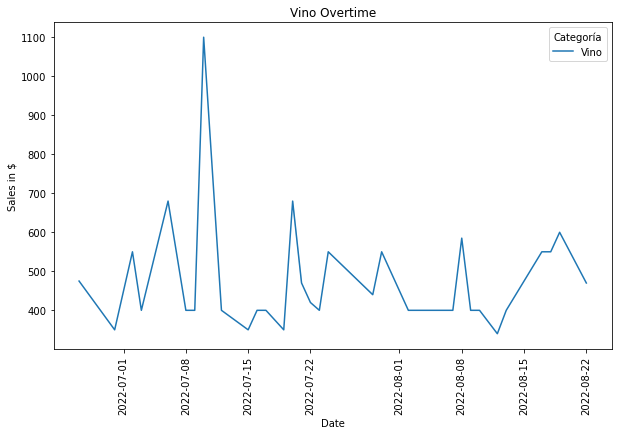

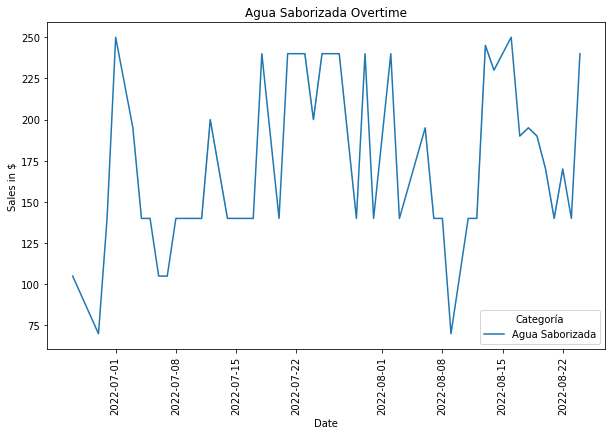

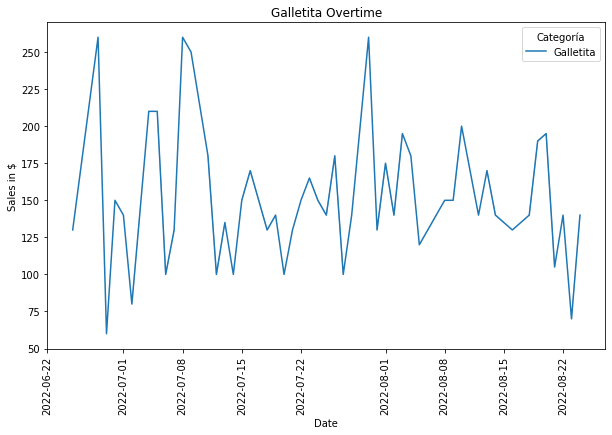

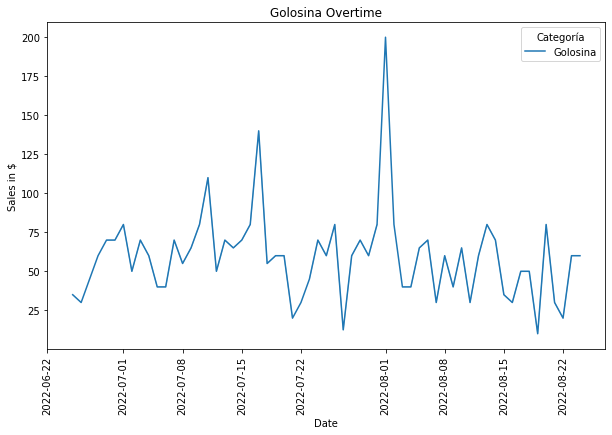

In [202]:
# Top 10 Categories Overtime

top_categories_by_sales = df[['Categoría', 'Monto']].groupby(by=['Categoría'],
                                                             as_index=False).sum().sort_values(by='Monto',
                                                                                               ascending=False).round().head(10)

top_10_cat = top_categories_by_sales.head(10)
for cat in top_10_cat['Categoría'].unique():
    plt.figure(figsize=(10,6))
    ax = sns.lineplot(x='Fecha', y='Monto', estimator=np.median, hue='Categoría',
                 data=df[df['Categoría']==cat], ci=False).set_title('{} Overtime'.format(cat))
    plt.ylabel('Sales in $')
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.show()

##### Top 10 Products Overtime

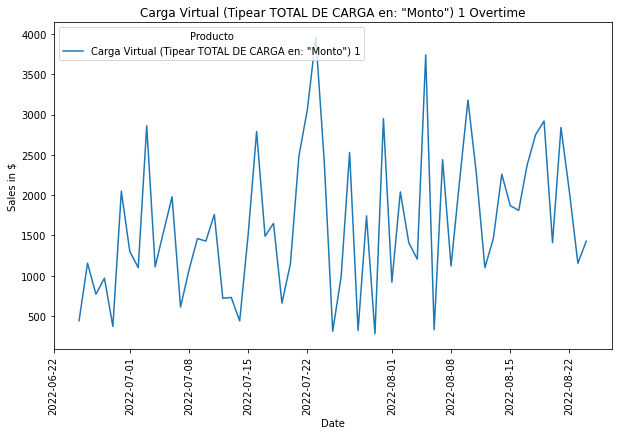

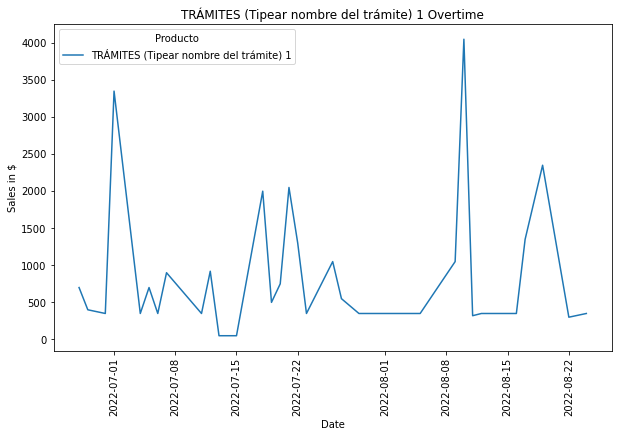

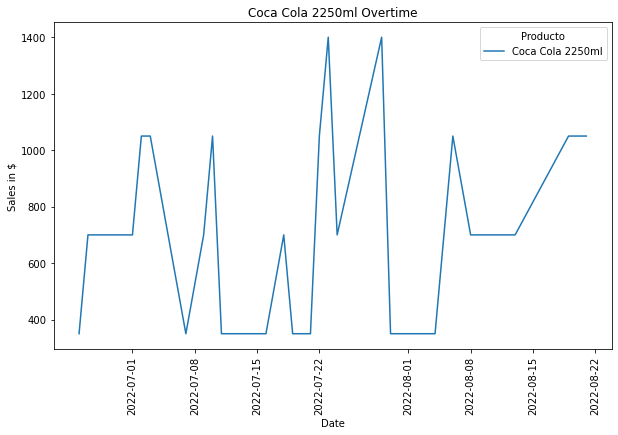

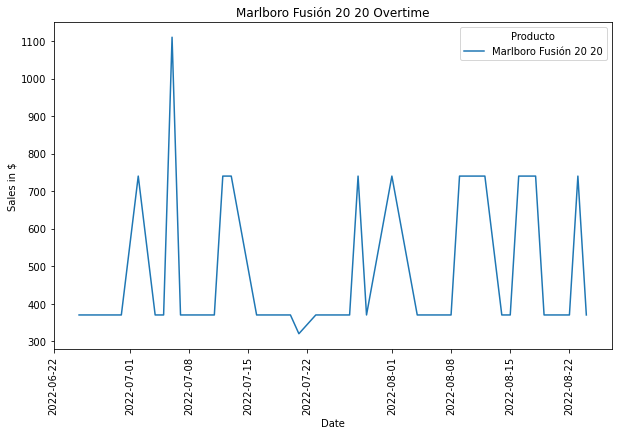

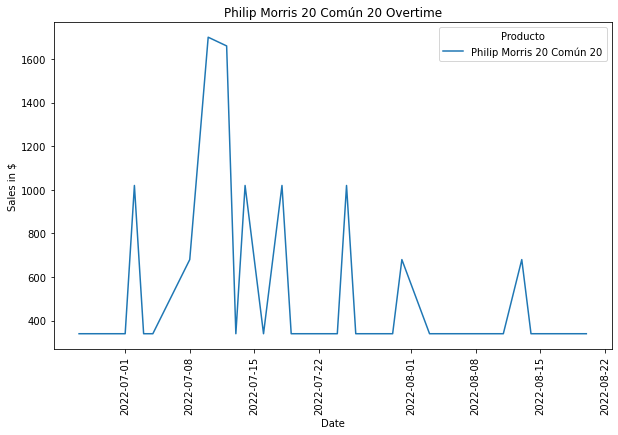

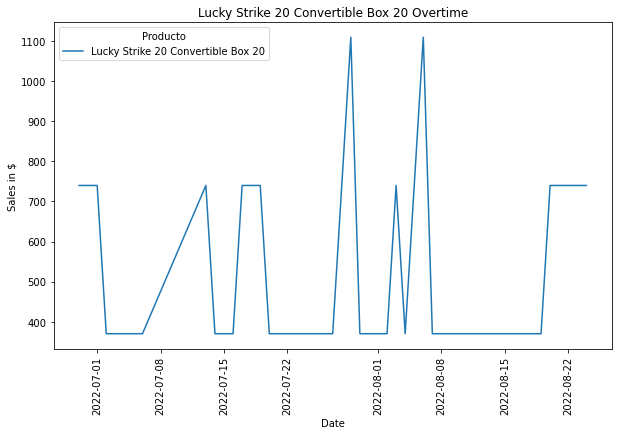

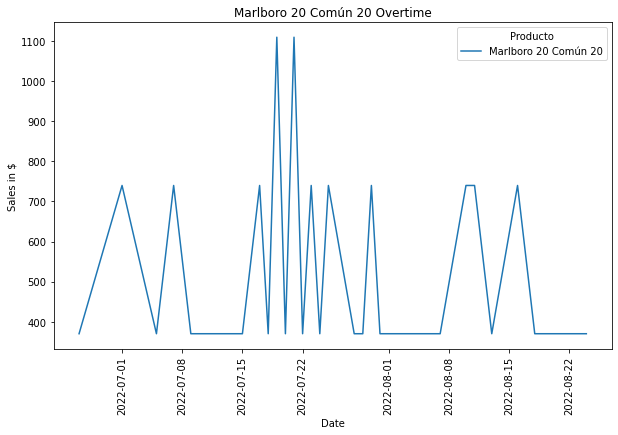

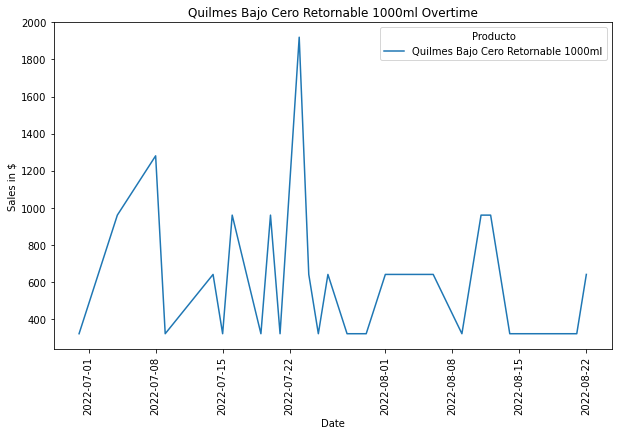

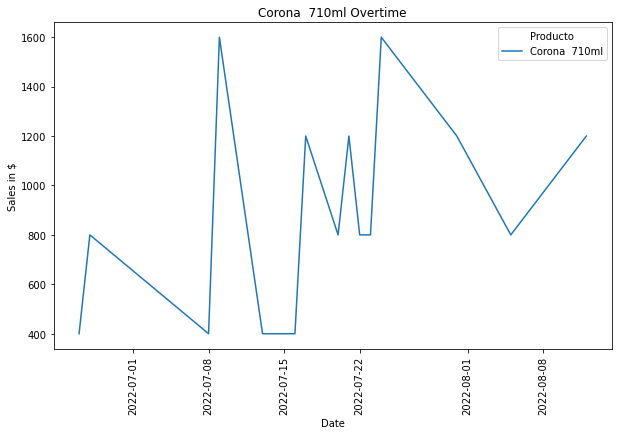

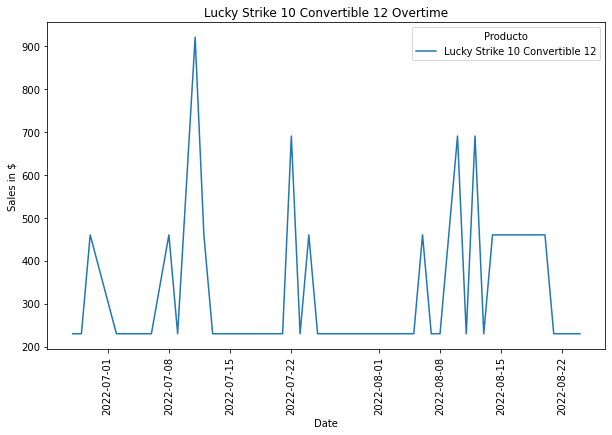

In [203]:
# Top 10 Products Overtime

top_10_products_by_sales = df[['Producto', 'Monto']].groupby(by=['Producto'],
                                                             as_index=False).sum().sort_values(by='Monto',
                                                                                               ascending=False).round().head(10)

for prod in top_10_products_by_sales['Producto'].unique():
    plt.figure(figsize=(10,6))
    sns.lineplot(x='Fecha', y='Monto', hue='Producto', 
                 data=df[df['Producto']==prod].groupby(['Fecha', 'Producto']).sum()).set_title('{} Overtime'.format(prod))
    plt.ylabel('Sales in $')
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.show()

##### Sales Overtime

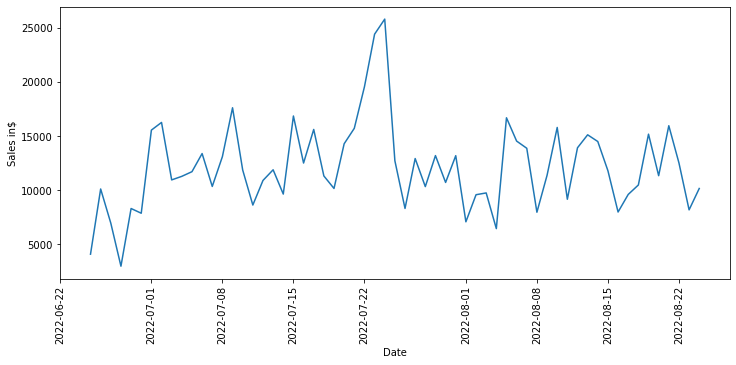

In [204]:
sales_overtime = df[['Fecha','Monto']].groupby(['Fecha'], as_index=False).sum()

# GRAPH
plt.figure(figsize=(12,5))
ax = sns.lineplot(x='Fecha', y='Monto', data=sales_overtime, ci=None, palette='r')
ax.set(xlabel='Date', ylabel='Sales in$')
plt.xticks(rotation=90)
plt.show()

##### Net Income Overtime

In [205]:
# Net Income
df['Net Income'] = df['Monto'] - df['Total COGS']

# Net Income %
df['Net Income %'] = df['Net Income'] / df['Monto'] * 100
df['Net Income %'] = df['Net Income %'].round(2)
df.describe()

,Product_ID,Precio Costo,Total COGS,Cantidad,Precio Unitario,Monto,Net Income,Net Income %
count,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000
mean,177.751417,100.532297,141.776243,26.385425,145.056675,199.747806,57.971563,37.844607
std,115.990227,106.297056,150.080296,104.558769,146.894803,191.198053,94.509892,34.237931
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-267.000000,-809.090000
25%,88.000000,1.000000,32.000000,1.000000,20.000000,60.000000,20.000000,21.740000
50%,186.000000,75.000000,105.000000,1.000000,100.000000,160.000000,42.000000,25.000000
75%,235.000000,173.000000,200.000000,2.000000,240.000000,270.000000,60.000000,37.140000
max,529.000000,750.000000,2000.000000,2000.000000,2000.000000,2200.000000,2000.000000,100.000000


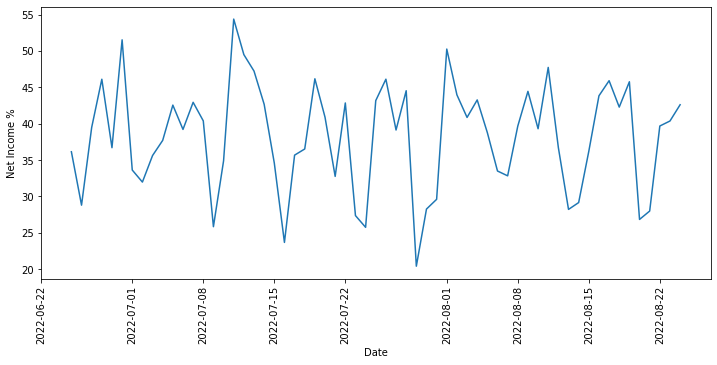

In [206]:
# GRAPH

plt.figure(figsize=(12,5))
ax = sns.lineplot(x='Fecha', y='Net Income %', data=df, ci=None, palette='dark:salmon_r')
plt.ylabel('Net Income %')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.show()

##### Top 10 Categories by Sales

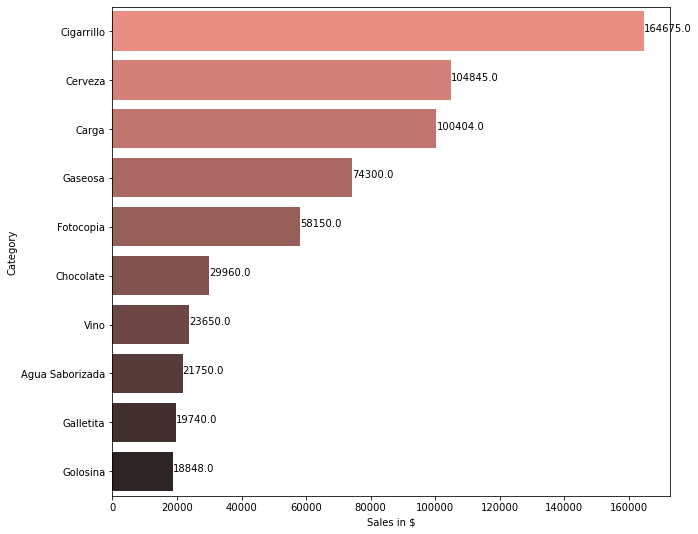

In [207]:

# GRAPH

plt.figure(figsize=(10, 9)) 

ax = sns.barplot(x="Monto", y="Categoría", data=top_categories_by_sales, palette='dark:salmon_r')
ax.set_xlabel('Sales in $')
ax.set_ylabel('Category')

for index, value in enumerate(top_categories_by_sales['Monto']):
    plt.text(value, index, str(value))

##### Top 10 Products by Sales

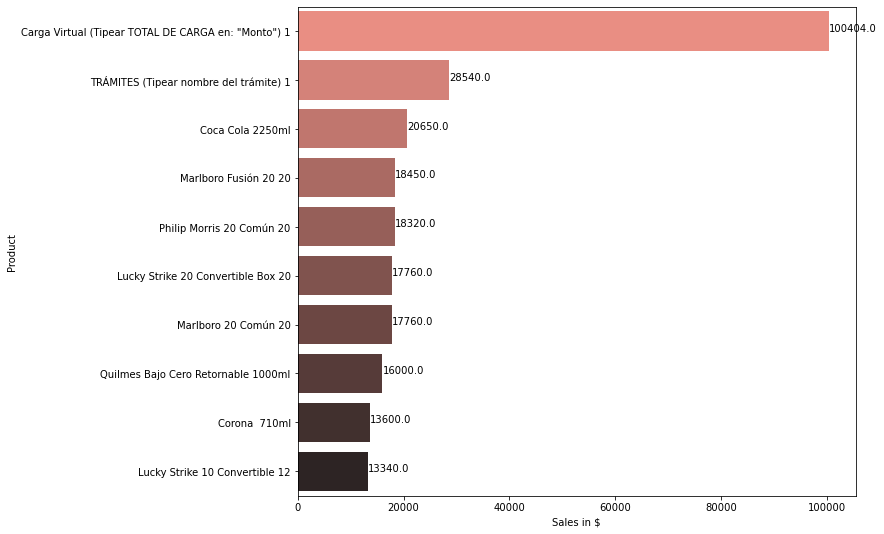

In [208]:
# GRAPH

plt.figure(figsize=(10, 9)) 

ax = sns.barplot(x="Monto", y="Producto", data=top_10_products_by_sales, palette='dark:salmon_r')
ax.set_xlabel('Sales in $')
ax.set_ylabel('Product')

for index, value in enumerate(top_10_products_by_sales['Monto']):
    plt.text(value, index, str(value))

##### Total Sales by Day

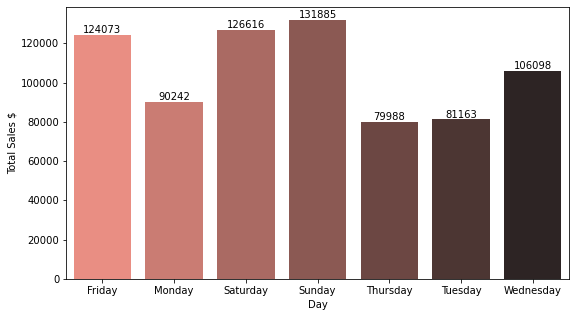

In [200]:
sales_by_day = df[['Day', 'Monto']].groupby(['Day'], as_index=False).sum().round()

# GRAPH

plt.figure(figsize=(9,5)) 

ax = sns.barplot(x="Day", y="Monto", data=sales_by_day, palette='dark:salmon_r')
ax.set_xlabel('Day')
ax.set_ylabel('Total Sales $')

for i in ax.containers:
    ax.bar_label(i,)

##### Total Net Income by Day

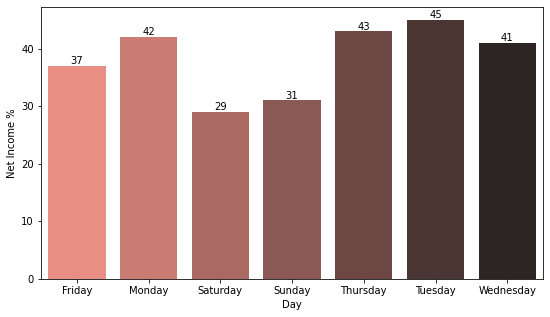

In [201]:
net_income_by_day = df[['Day', 'Net Income %']].groupby(['Day'], as_index=False).mean().round()

# GRAPH

plt.figure(figsize=(9,5)) 

ax = sns.barplot(x="Day", y="Net Income %", data=net_income_by_day, palette='dark:salmon_r')
ax.set_xlabel('Day')
ax.set_ylabel('Net Income %')

for i in ax.containers:
    ax.bar_label(i,)